In [1]:
#Visualizing Data

import pandas as pd
import matplotlib.pyplot as plt

In [26]:
#Downloading DataSet

download_url = (
    "https://raw.githubusercontent.com/fivethirtyeight/"
    "data/master/college-majors/recent-grads.csv"
)

df = pd.read_csv(download_url)

type(df)

pd.set_option("display.max.columns", None)
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


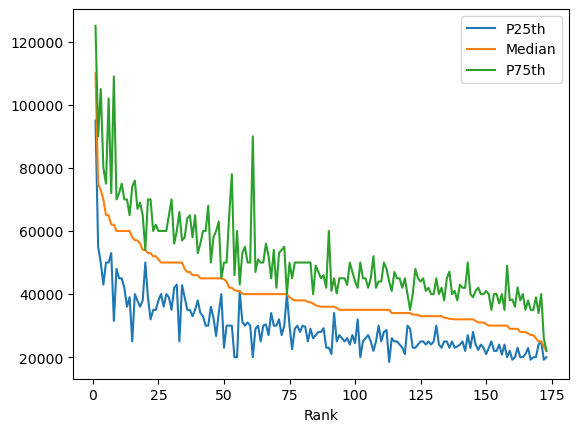

In [4]:
#x axis representing the Rank of each institution
#y axis representing the 25th Percentile, Median, and 75th Percentile

df.plot(x = "Rank", y = ["P25th", "Median", "P75th"])
plt.show()

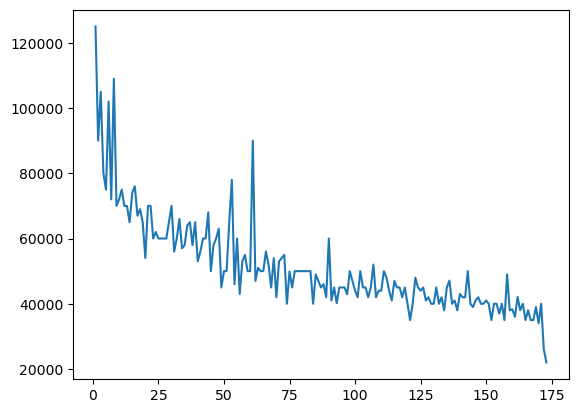

In [8]:
#75th percentile against the Rank

plt.plot(df["Rank"], df["P75th"])
plt.show()

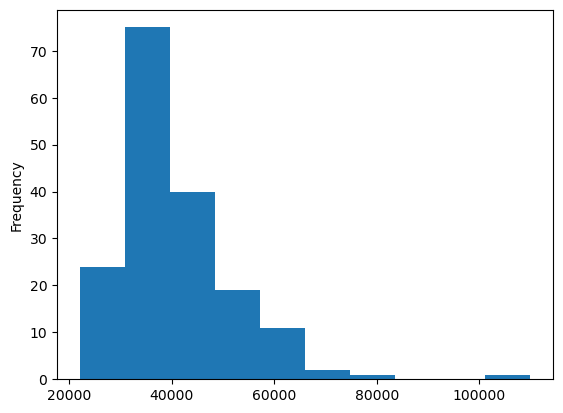

In [25]:
#Histogram showing data grouped ranging from $20,000 - 120,000

median_column = df["Median"]

type(median_column)

median_column.plot(kind = "hist")
plt.show()

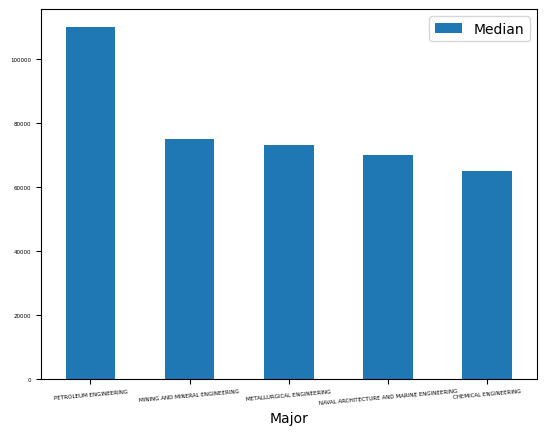

In [24]:
#Top five most lucrative majors

top_5 = df.sort_values(by = "Median", ascending = False).head()

top_5.plot(x = "Major", y = "Median", kind = "bar", rot = 5, fontsize = 4)
plt.show()

<Axes: xlabel='Major'>

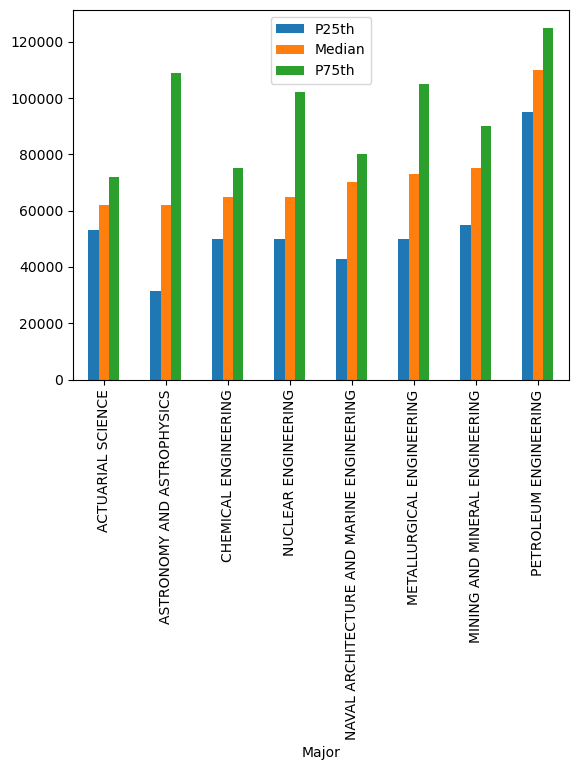

In [15]:
#All majors whose median salary is above $60,000

top_medians = df[df["Median"] > 60000].sort_values("Median")
top_medians.plot(x = "Major", y = ["P25th", "Median", "P75th"], kind = "bar")

<Axes: xlabel='Median', ylabel='Unemployment_rate'>

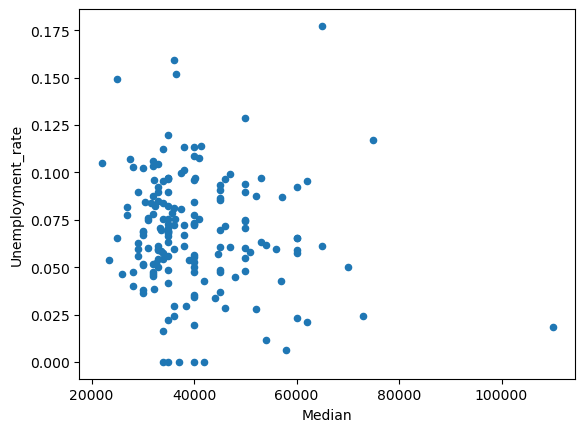

In [16]:
#Checking for correlation between earnings and unemployment rate

df.plot(x = "Median", y = "Unemployment_rate", kind = "scatter")

In [17]:
#Aggregating popularity of each category 

cat_totals = df.groupby("Major_category")["Total"].sum().sort_values()
cat_totals

Major_category
Interdisciplinary                        12296.0
Agriculture & Natural Resources          75620.0
Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Industrial Arts & Consumer Services     229792.0
Computers & Mathematics                 299008.0
Arts                                    357130.0
Communications & Journalism             392601.0
Biology & Life Science                  453862.0
Health                                  463230.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Engineering                             537583.0
Education                               559129.0
Humanities & Liberal Arts               713468.0
Business                               1302376.0
Name: Total, dtype: float64

<Axes: ylabel='Major_category'>

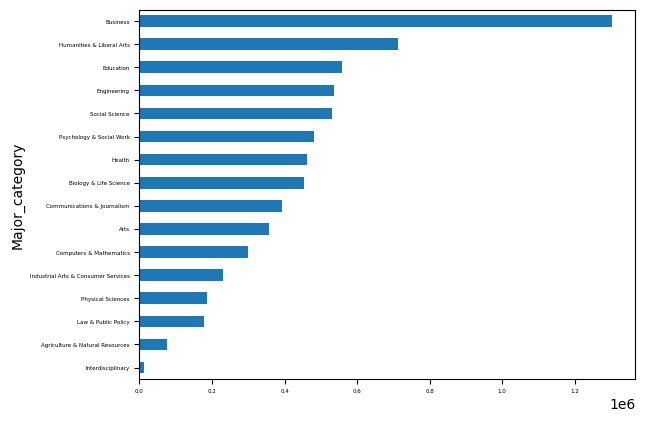

In [18]:
#Horizontal bar chart showing category of majors based on popularity

cat_totals.plot(kind = "barh", fontsize = 4)

<Axes: >

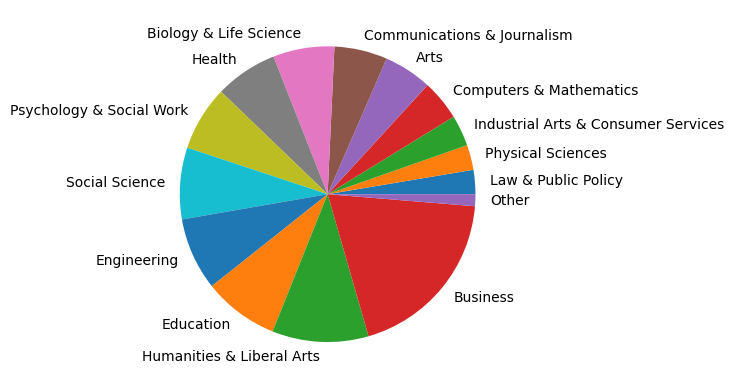

In [23]:
#Pie chart based on Major Category

small_cat_totals = cat_totals[cat_totals < 100_000]

big_cat_totals = cat_totals[cat_totals > 100_000]

small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])

big_cat_totals = big_cat_totals._append(small_sums)

big_cat_totals.plot(kind="pie", label="")